In [116]:
import numpy as np
import gdal
import matplotlib.pyplot as plt
import os
import pandas as pd
import datetime
import bisect
%matplotlib inline

In [117]:
# read all band images in a directory
images = {}
image_dir = 'earthengine_images/'
for fn in os.listdir(image_dir):
    raw = gdal.Open(image_dir + fn)
    arr = raw.ReadAsArray()
    images[fn.split('.')[0]] = arr

In [118]:
for k, v in images.items():
    print(k + ' ' + str(v.shape))

LC80930862015088 (3, 117, 311)
LC80940862016066 (3, 117, 311)
LC80930862016091 (3, 117, 311)
LC80930862015264 (3, 117, 311)
LC80940862015335 (3, 117, 311)
LC80940862015175 (3, 117, 311)
LC80930862015344 (3, 117, 311)
LC80940862015159 (3, 117, 311)
LC80940862015239 (3, 117, 311)
LC80930862015280 (3, 117, 311)
LC80930862016059 (3, 117, 311)
LC80940862015303 (3, 117, 311)
LC80940862016002 (3, 117, 311)
LC80940862016082 (3, 117, 311)
LC80930862016011 (3, 117, 311)
LC80940862015079 (3, 117, 311)
LC80940862016034 (3, 117, 311)
LC80930862015184 (3, 117, 311)
LC80940862015191 (3, 117, 311)
LC80930862015312 (3, 117, 311)
LC80930862015168 (3, 117, 311)
LC80940862016018 (3, 117, 311)
LC80930862015040 (3, 117, 311)
LC80940862015287 (3, 117, 311)
LC80940862015047 (3, 117, 311)
LC80930862015216 (3, 117, 311)
LC80940862015319 (3, 117, 311)
LC80930862015328 (3, 117, 311)
LC80930862015360 (3, 117, 311)
LC80930862015120 (3, 117, 311)
LC80930862016027 (3, 117, 311)
LC80940862015111 (3, 117, 311)
LC809308

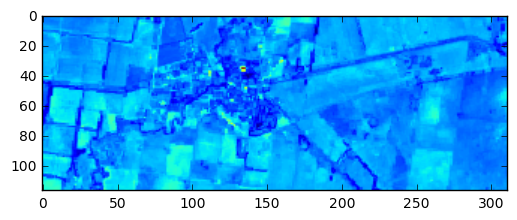

In [119]:
plt.imshow(images['LC80930862015040'][2, :, :])
plt.show()

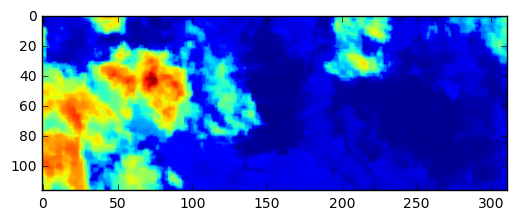

In [120]:
plt.imshow(images['LC80940862015079'][2, :, :])
plt.show()

In [121]:
# read all mask images in a directory
masks = {}
mask_dir = 'earthengine_masks/'
for fn in os.listdir(mask_dir):
    raw = gdal.Open(mask_dir + fn)
    arr = raw.ReadAsArray()
    masks[fn.split('.')[0]] = arr

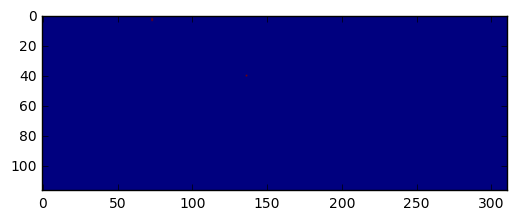

In [122]:
plt.imshow(masks['LC80930862015040'][0, :, :])
plt.show()

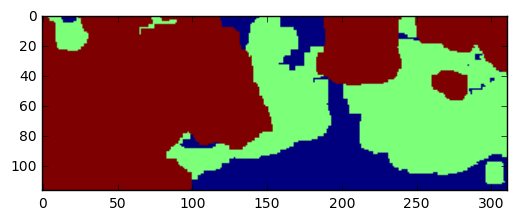

In [123]:
plt.imshow(masks['LC80940862015079'][0, :, :])
plt.show()

In [124]:
# compose band and mask images into one image
combined = {}
image_dir = 'earthengine_images/'
mask_dir = 'earthengine_masks/'
for fn in os.listdir(image_dir):
    raw_img = gdal.Open(image_dir + fn)
    arr_img = raw_img.ReadAsArray()
    raw_msk = gdal.Open(mask_dir + fn)
    arr_msk = raw_msk.ReadAsArray()
    combined[fn.split('.')[0]] = np.concatenate((arr_img, arr_msk), axis=0)

In [125]:
print(combined['LC80940862015079'].shape)

(5, 117, 311)


In [126]:
# use image names to look up metadata from csv export
table = pd.read_csv('earthengine_tables/LC8_SR.csv')
time_start = table[['system:index', 'system:time_start']]

In [127]:
time_start

,system:index,system:time_start
0,LC80930862015040,1423440571231
1,LC80930862015056,1424822966175
2,LC80930862015072,1426205354132
3,LC80930862015088,1427587746370
4,LC80930862015120,1430352533188
5,LC80930862015136,1431734919028
6,LC80930862015152,1433117325195
7,LC80930862015168,1434499736147
8,LC80930862015184,1435882143244
9,LC80930862015200,1437264552573


In [128]:
time_start[time_start['system:index'] == 'LC80930862015040'].ix[0, 1]

1423440571231

In [129]:
# compose all data into a single data frame
ds = {}
for k, v in combined.items():
    ts = time_start[time_start['system:index'] == k]['system:time_start'].iloc[0]
    ds[ts] = v

In [130]:
print(ds.keys())

dict_keys([1440634536577, 1432340092546, 1459382957827, 1445558982533, 1458000568200, 1433117325195, 1435882143244, 1442016943362, 1428192911630, 1457223342061, 1426205354132, 1453853382683, 1424822966175, 1442794176672, 1449706184998, 1448323787335, 1452470982577, 1454458551604, 1450311357239, 1423440571231, 1436487319228, 1441411768125, 1424045737534, 1439252129269, 1427587746370, 1451088586307, 1430352533188, 1448928958023, 1438646955592, 1440029363213, 1426810523472, 1434499736147, 1447546555861, 1444781749463, 1458605735131, 1429575310943, 1446164155488, 1451693755106, 1446941385063, 1430957695975, 1444176579436, 1433722502125, 1437869725294, 1455235776496, 1456618171987, 1431734919028, 1435104908414, 1443399349500, 1437264552573, 1453076154238])


In [131]:
# getting ready for interpolation / training

In [132]:
# get time series at a point
def getTS(data, x, y):
    times = list(data.keys())
    times.sort()
    ts = dict(map(lambda t: (t, data[t][:, x, y]), times))
    df = pd.DataFrame(ts).transpose()
#     df['date'] = df.index.map(lambda t: str(datetime.datetime.fromtimestamp(t/1000).date()))
    return df

In [133]:
df = getTS(ds, 20, 30)
df

,0,1,2,3,4
1423440571231,1908,1140,833,0,1
1424045737534,2214,1203,854,2,1
1424822966175,8770,8161,7738,4,3
1426205354132,1495,884,595,4,3
1426810523472,2080,1265,914,4,1
1427587746370,2065,1229,865,0,1
1428192911630,6130,5782,5672,4,3
1429575310943,3571,2966,2884,4,3
1430352533188,1808,1008,687,0,1
1430957695975,3759,3022,2872,4,3


cfmask: cloud mask.

    0=clear
    1=water
    2=shadow
    3=snow
    4=cloud

cfmask_conf: cloud mask confidence

    0=none
    1=cloud confidence ≤ 12.5%
    2=cloud confidence > 12.5% and ≤ 22.5%
    3=cloud confidence > 22.5%

In [134]:
def selectClear(df, level=1):
    return df.ix[(df.ix[:, 3] == 0) & (df.ix[:, 4] <= level), [0, 1, 2]]

In [135]:
clear = selectClear(df, 1)
clear

,0,1,2
1423440571231,1908,1140,833
1427587746370,2065,1229,865
1430352533188,1808,1008,687
1431734919028,1306,571,422
1433117325195,923,249,216
1437264552573,3093,166,304
1444176579436,4782,153,313
1444781749463,4198,186,319
1445558982533,3989,273,377
1446941385063,2987,597,578


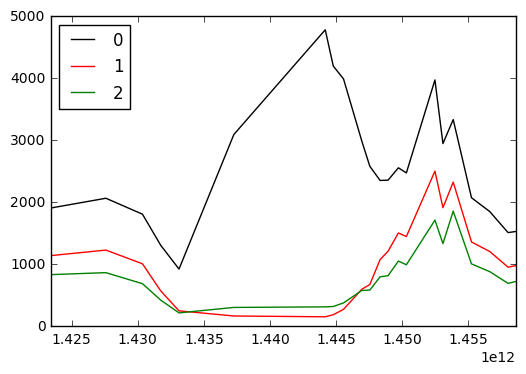

In [136]:
clear.plot(color=['k', 'r', 'g'])

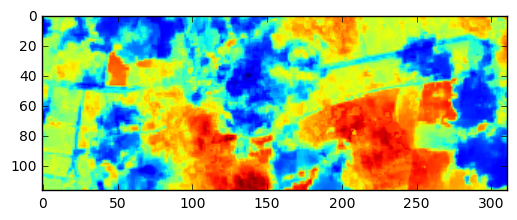

In [137]:
plt.imshow(ds[1444176579436][0, :, :])
plt.show()

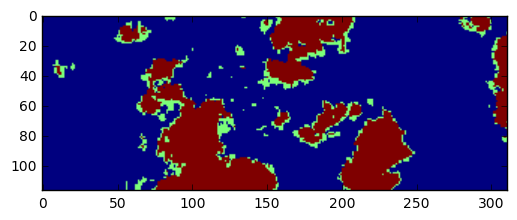

In [138]:
plt.imshow(ds[1444176579436][4, :, :])
plt.show()

In [139]:
str(datetime.datetime.fromtimestamp(1444176579436/1000).date())

'2015-10-07'

In [140]:
# interpolate at timestamp
def interpolate(data, timestamp):
    times = data.index
    if timestamp <= times[0]:
        values = data.iloc[0, :3]
    elif timestamp >= times[-1]:
        values = data.iloc[-1, :3]
    else:
        i = bisect.bisect(times, timestamp)
        delta_x = timestamp - times[i - 1]
        if delta_x == 0:
            values = data.iloc[i - 1, :3]
        else:
            low = data.iloc[i - 1, :3]
            high = data.iloc[i, :3]
            interval = (times[i] - times[i - 1])
            values = low + (high - low) / interval * delta_x
    return values

In [141]:
# 1427587746370
mid = (1433117325195 + 1437264552573) / 2
print(mid)
interpolate(clear, mid)

1435190938884.0


0    2008.0
1     207.5
2     260.0
dtype: float64

In [142]:
# interpolate all points in an image

In [143]:
def interpolateImage(data, timestamp):
    dims = data[list(data.keys())[0]].shape
    dim_x = dims[1]
    dim_y = dims[2]
    image = np.zeros((3, dim_x, dim_y))
    for x in range(0, dim_x):
        for y in range(0, dim_y):
            data_point = getTS(data, x, y)
            clear_point = selectClear(data_point, 1)
            values = interpolate(clear_point, timestamp)
            image[:, x, y] = values
    return image

In [144]:
image = interpolateImage(ds, mid)

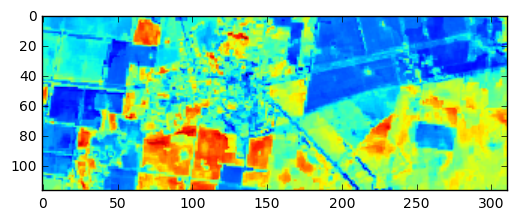

In [145]:
plt.imshow(image[0, :, :])
plt.show()

In [ ]:
# remove cloud and interpolate